# Task 1:  
Use ranger() to predict remote working, and compute the confusion matrix (using the full data set for both)

In [1]:
library(ranger)

so <- read.csv('stack_overflow.csv')
so$remote <- factor(as.integer(so$remote == 'Remote'))
so$respondent <- NULL

r <- ranger(remote ~ ., data=so, classification=T, importance='permutation')
r

Ranger result

Call:
 ranger(remote ~ ., data = so, classification = T, importance = "permutation") 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      6991 
Number of independent variables:  20 
Mtry:                             4 
Target node size:                 1 
Variable importance mode:         permutation 
Splitrule:                        gini 
OOB prediction error:             10.37 % 

In [2]:
table(actual=so$remote, pred=predict(r, data=so)$predictions)

      pred
actual    0    1
     0 6273    0
     1  285  433

# Task 2:  
Using permutation importance, what were the most important six variables? Based on the definition of permutation importance, what does a negative importance mean?

In [3]:
i <- importance(r)
i <- i[order(-i)]
i[1:6]

salary                country    company_size_number 
          0.0179705922           0.0121064759           0.0058366343 
       years_coded_job          web_developer database_administrator 
          0.0032482143           0.0010693828           0.0007453856

Permutation importance is the increase in error between the forest trained on all variables vs the forest trained without that variable, thus a negative importance would indicate a decrease in error having dropped that variable.

# Task 3:  
Only about 10% of developers work remotely. Use the class.weights option of ranger() to reweight the two possible outcomes so that the total weight for the remote workers is the same as for the non-remote workers, and compute the new confusion matrix. 

In [4]:
r2 <- ranger(factor(remote) ~ ., data=so, classification=T, 
            importance='permutation', class.weights=c(1, 6273/718))

table(actual=so$remote, pred=predict(r2, so)$predictions)

      pred
actual    0    1
     0 6228   45
     1    6  712

# Task 4:  
Using permutation importance, what were the most important six variables -- have these changed from the unweighted fit? Graph or tabulate the outcome against these six variables and comment on the relationships

In [5]:
i2 <- importance(r2)
i2 <- i2[order(-i2)]
names(i2[1:6])
names(i[1:6])

[1] "salary"               "country"              "company_size_number" 
[4] "open_source"          "years_coded_job"      "graphics_programming"

[1] "salary"                 "country"                "company_size_number"   
[4] "years_coded_job"        "web_developer"          "database_administrator"

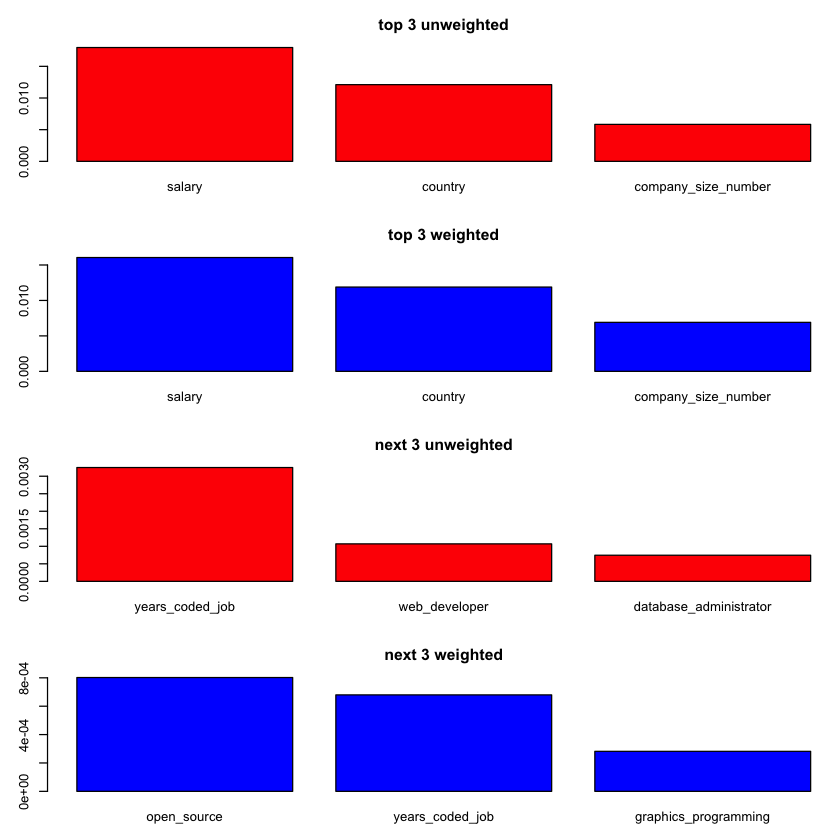

In [6]:
par(mfrow=c(4, 1), mar=c(3, 3, 3, 0))
barplot(i[1:3], col='red', main='top 3 unweighted')
barplot(i2[1:3], col='blue', main='top 3 weighted')

barplot(i[4:6], col='red', main='next 3 unweighted')
barplot(i2[4:6], col='blue', main='next 3 weighted')

Open source is much higher ranked as an indicator in the weighted model.

# Task 5: 
Describe the impact of weighting (how has the accuracy changed for remote workers, how has it changed for non-remote workers).

Weighting has greatly improved accuracy for remote workers, the minority class. Accuracy has also improved for the majority class, because there are now fewer false positives.